In [2]:
import numpy as np
from IPython.display import HTML
from shape_boat import *
from shape import *
%reload_ext autoreload
%autoreload 2
from multiboat_trajectory_optimization.boat_models import Boat

In [21]:
boat1_exp = np.genfromtxt('results/SHAPE_SHIFTING_LOG20190125_134303_numpy.csv',delimiter=',')
offset = 16
vals1 = boat1_exp[offset:,:6]
refs1 = boat1_exp[offset:,6:]
for x in [vals1, refs1]:
    x[:,0] -= 3.65
    x[:,1] -= 0.5
    x[:,2] += 0
    
S = np.zeros((3, vals1.shape[0],3))
S[0,:] = [-.45/2,0,np.pi/2]
S[1,:] = [.45/2,0,np.pi/2]
S[2,:] = vals1[:,:3]

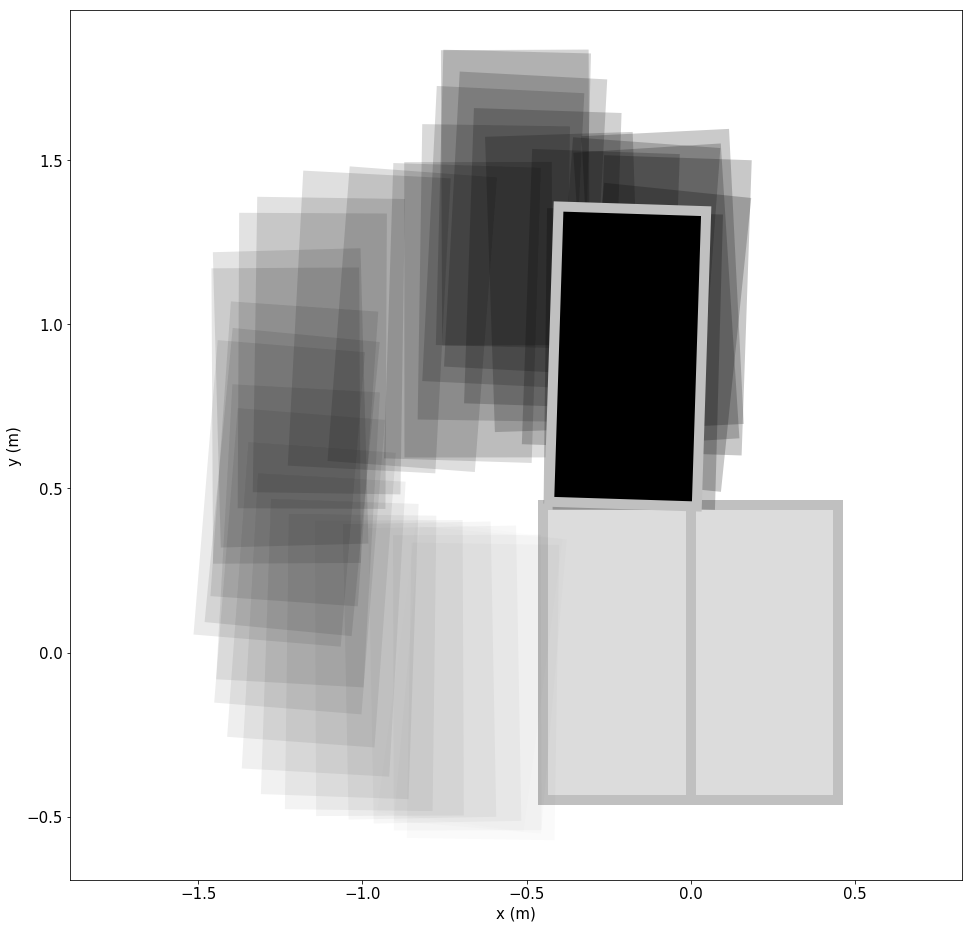

In [114]:
from matplotlib import pyplot as plt
plot = plt.subplots(nrows=1,ncols=1, figsize=(16,16))
b.plot_configurations(S[:2],boat_color='gainsboro',edge_color='silver', edge_width=10, plot=plot)
b.plot_configurations(S[2:],boat_color='black',edge_color='silver', edge_width=10, plot=plot, stride=5)
plt.axis('equal')
plt.xlabel('x (m)', fontsize='15')
plt.ylabel('y (m)', fontsize='15')
plt.tick_params(labelsize='15')
plt.show()

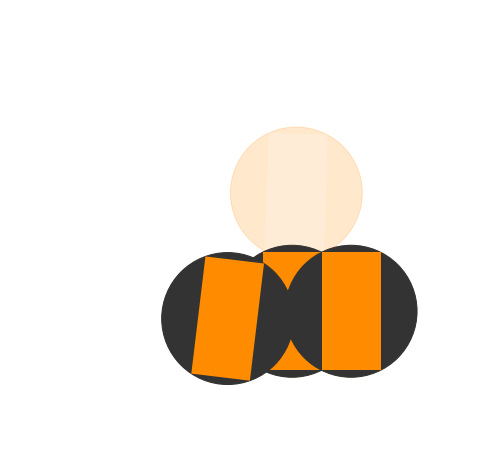

In [16]:
anim = b.plot_animation(S)

In [21]:
HTML(anim.to_html5_video())

In [ ]:
import pickle
with open('results/MIQP_result_slow.pickle', 'rb') as f:
    experiments = pickle.load(f)
#print experiments['spline init']['9_shinkyu1']

In [7]:
s=0.90625
shape_1a = Shape([Block(0,0,scale=s)])
shape_1b = Shape([Block(0,0,90,scale=s)])
shape_2a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s)])
shape_2b = Shape([Block(0,0.25,scale=s),   Block(0,-0.25,scale=s)])
shape_2c = Shape([Block(-.25,0,90,scale=s),Block(0.25,0,90,scale=s)])

In [9]:
tests = {
         '9_shinkyu1':          (shape_1b, shape_2c, (s*-.75, s*0.,     0.),  (s*-.25,  s*1.,    0.)),  \
         '10_shinkyu2':         (shape_1b, shape_2c, (s*-.75, s*0.,     0.),  (s*0.,    s*.75,   90)),  \
         '11_shinkyu3-1':       (shape_2c, shape_1b, (s*-.75, s*0.,     0.),  (s*0.,    s*1.,    0.)),  \
        }

In [29]:
b = ShapeBoat_spline(*tests['9_shinkyu1'][:2])
x0 = np.zeros((1,6))
xN = np.zeros((1,6))
x0[0,:3] = tests['9_shinkyu1'][2] 
xN[0,:3] = tests['9_shinkyu1'][3] 

b.set_end_points(x0, xN)

SETTING ENDPOINTS
Calculated C-Space: 0.287234 seconds
Set up graph: 0.094209 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 26 28


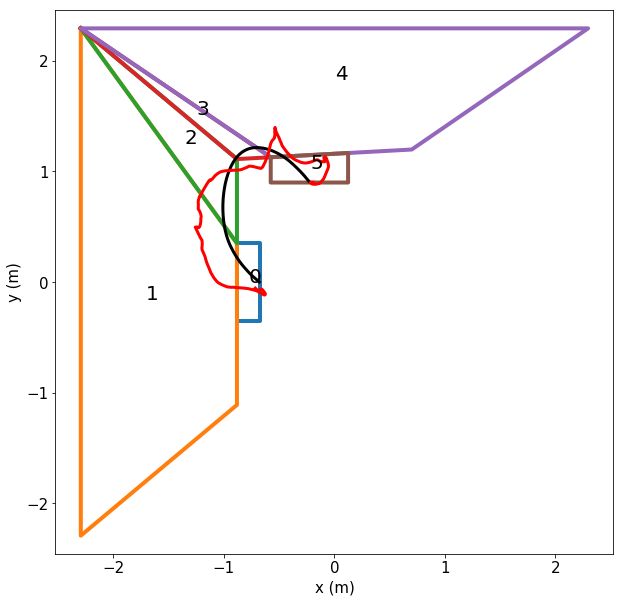

In [34]:
b.plot_hulls(S_knots=vals1.reshape((1,len(vals1),-1)),S=refs1.reshape((1,len(refs1),-1)))

In [27]:
print refs1.shape

(206, 6)


### Test refs for consistency 

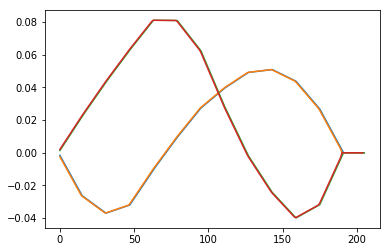

In [43]:
plt.plot(refs1[:,3])
plt.plot(5*(refs1[1:,0]-refs1[:-1,0]))

plt.plot(refs1[:,4])
plt.plot(5*(refs1[1:,1]-refs1[:-1,1]))